# Import

In [1]:
import pandas as pd
from pandas.api.types import is_string_dtype,is_numeric_dtype
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

The data is split in a training set and test set already but we will load the 2 datasets and merge into a single one. Also the datasets don't contain headers, so we'll add those as well.

In [2]:
train = pd.read_csv('adult.data', header=None)
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
test = pd.read_csv('adult.test',header=None)
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [9]:
df = pd.concat([train, test], ignore_index=True)
df.shape

(48842, 15)

In [10]:
column_headers = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
df.columns = column_headers
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


As a last step before moving on, we'll replace the values in the "income" column (target) with 1 and 0.

In [11]:
df['income'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [12]:
df['income'].value_counts()

 <=50K     24720
 <=50K.    12435
 >50K       7841
 >50K.      3846
Name: income, dtype: int64

We have encountered something else to clean before we proceed. The income column has trailing spaces, which means the other string columns could have them too. Let's get rid of those space before we continue.


In [13]:
# Separating columns in numerical and categorical
num_list = []
cat_list = []

for column in df:
    if is_numeric_dtype(df[column]):
        num_list.append(column)
    elif is_string_dtype(df[column]):
        cat_list.append(column)
        
print(num_list)
print(cat_list)

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


In [14]:
for column in cat_list:
    df[column] = df[column].str.strip(' ')

In [15]:
df['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [16]:
df['income'].replace({'>50K':1,'>50K.':1,'<=50K':0,'<=50K.':0}, inplace=True)

In [17]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [18]:
df['income'].value_counts()

0    37155
1    11687
Name: income, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


# Missing Values

In [20]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [21]:
for column in cat_list:
    print(df[column].value_counts(),'\n')

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64 

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64 

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64 

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical      

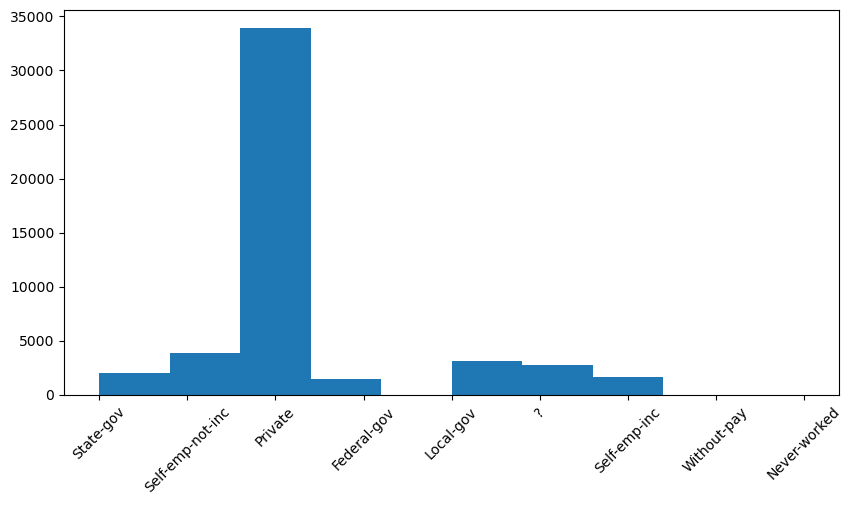

In [22]:
plt.figure(figsize=(10,5))
df['workclass'].hist()
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

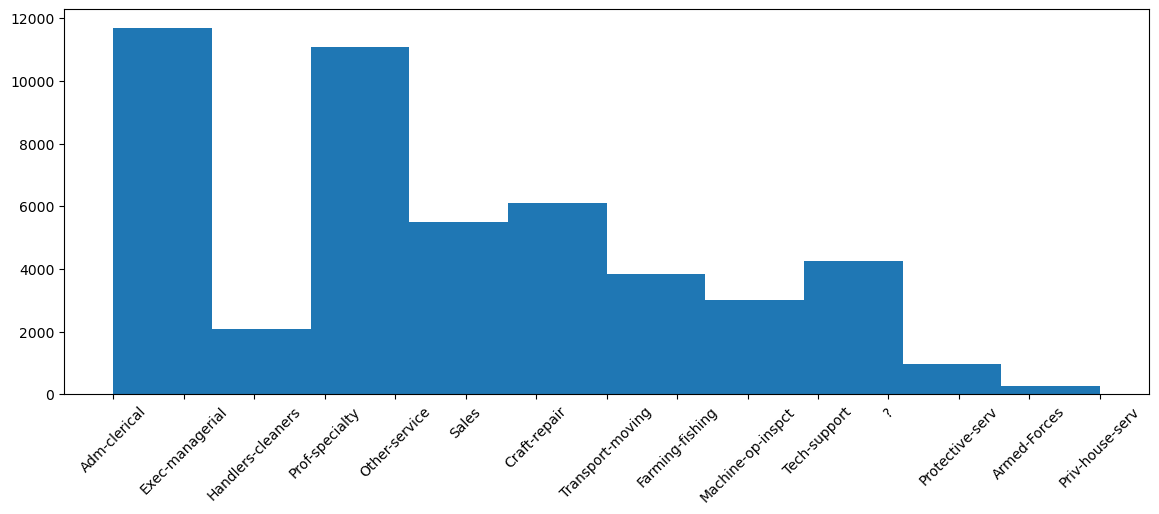

In [23]:
plt.figure(figsize=(14,5))
df['occupation'].hist()
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

In [24]:
df[df['workclass'] == '?']['occupation'].value_counts()

?    2799
Name: occupation, dtype: int64

In [25]:
df[df['occupation'] == '?']['workclass'].value_counts()

?               2799
Never-worked      10
Name: workclass, dtype: int64

We see that the rows with missing values for "workclass" overlap the rows with missing values from "occupation".


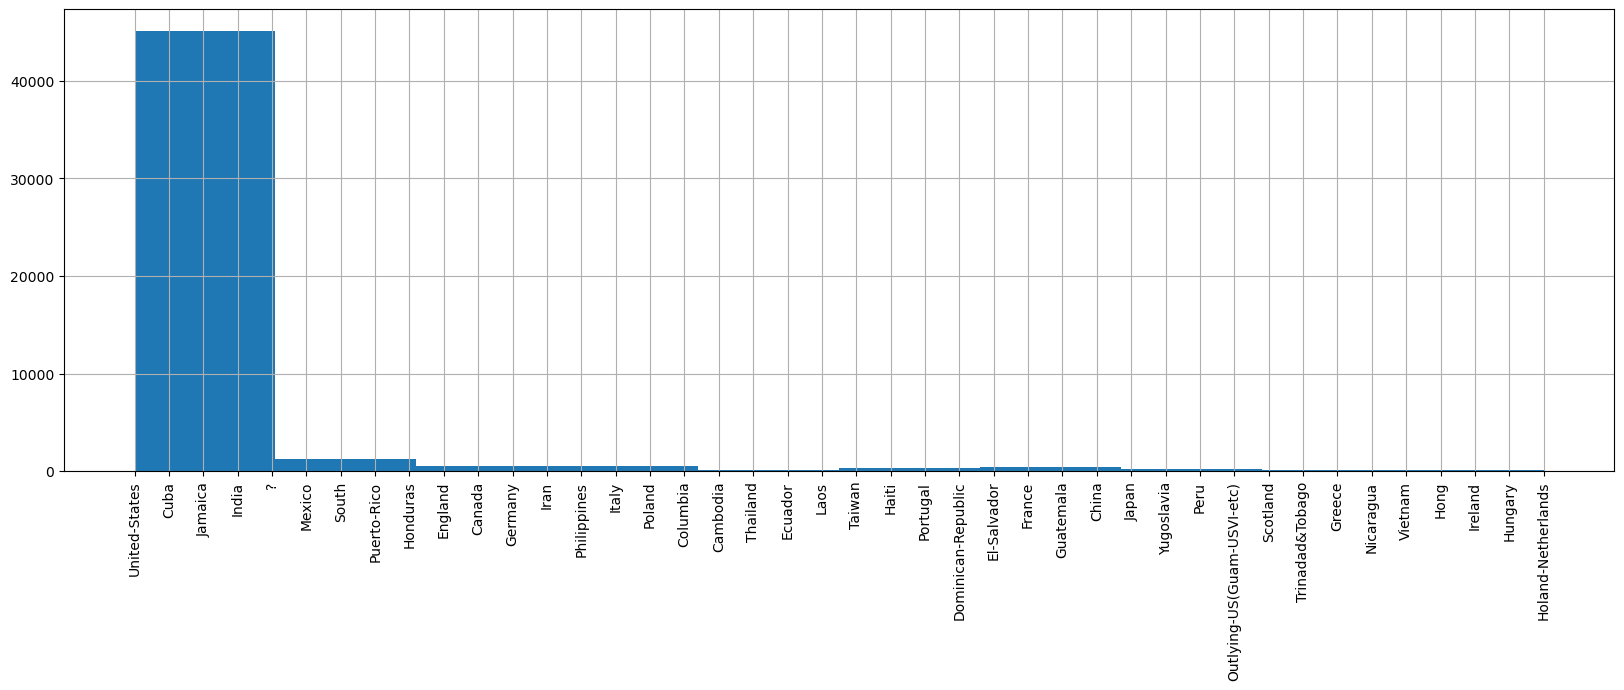

In [26]:
# Native Country
plt.figure(figsize=(20,6))
df['native-country'].hist()
plt.xticks(rotation=90)
plt.show()

In [27]:
df[df['native-country'] == '?']['occupation'].value_counts()

Prof-specialty       164
Other-service        115
Exec-managerial      102
Sales                 96
Craft-repair          92
Adm-clerical          71
Machine-op-inspct     52
?                     46
Transport-moving      39
Handlers-cleaners     26
Tech-support          26
Priv-house-serv       10
Farming-fishing       10
Protective-serv        7
Armed-Forces           1
Name: occupation, dtype: int64

In [28]:
df[df['native-country'] == '?']['workclass'].value_counts()

Private             599
Self-emp-not-inc     66
Self-emp-inc         49
?                    46
Local-gov            36
State-gov            35
Federal-gov          26
Name: workclass, dtype: int64

Since the colums with missing rows are categorical, we'll leave them as their own separate category and changed them to "Unknown".

In [29]:
df['workclass'].replace({'?':'Unknown'}, inplace=True)

In [30]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Unknown              2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [31]:
df['occupation'].replace({'?':'Unknown'}, inplace=True)

In [32]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Unknown              2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

# Visualizations

<AxesSubplot:xlabel='workclass', ylabel='count'>

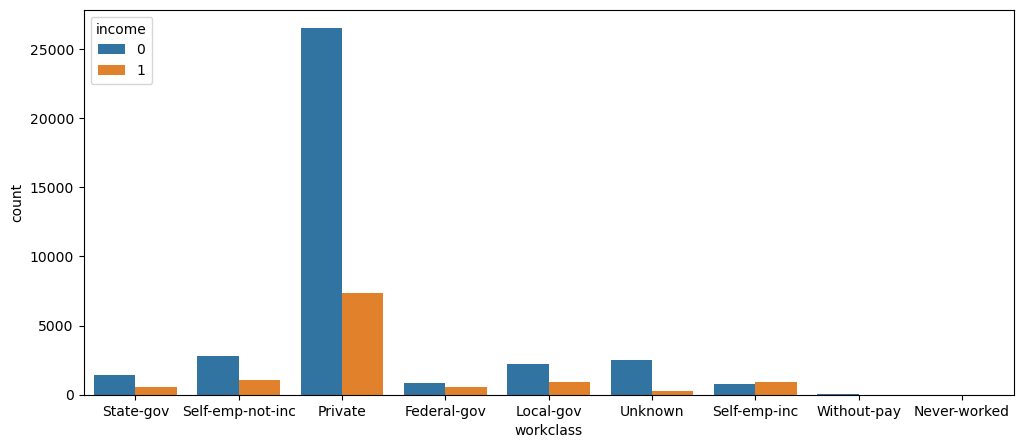

In [33]:
plt.figure(figsize=(12,5))
sns.countplot(x='workclass', hue='income', data=df)

<AxesSubplot:xlabel='education', ylabel='count'>

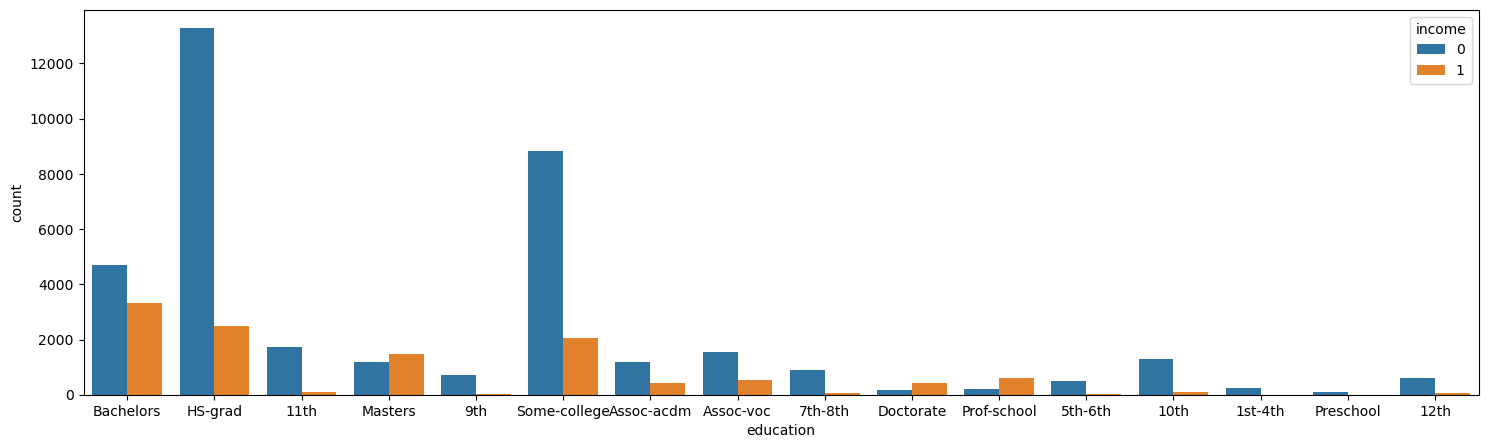

In [34]:
plt.figure(figsize=(18,5))
sns.countplot(x='education', hue='income', data=df)

<AxesSubplot:xlabel='marital-status', ylabel='count'>

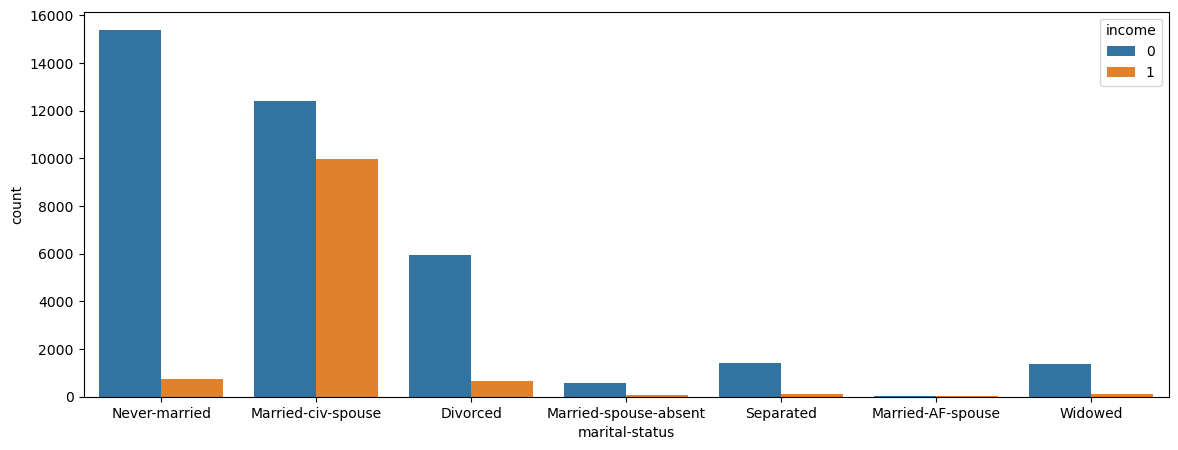

In [35]:
plt.figure(figsize=(14,5))
sns.countplot(x='marital-status', hue='income', data=df)

<AxesSubplot:xlabel='occupation', ylabel='count'>

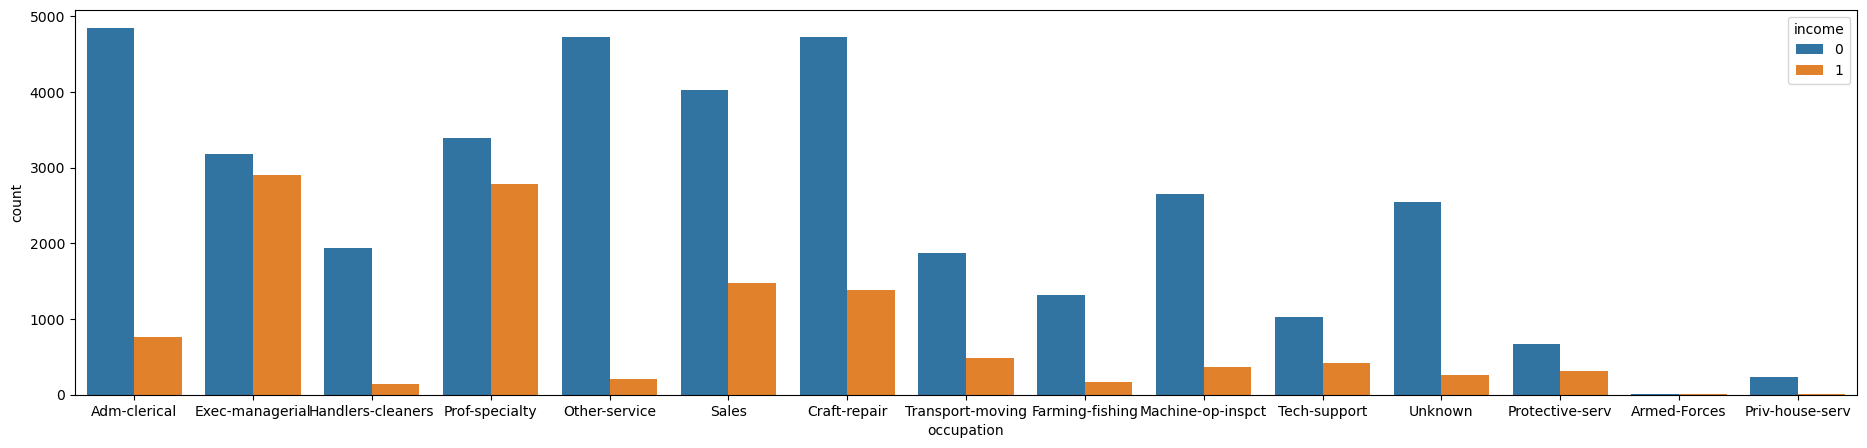

In [36]:
plt.figure(figsize=(23,5))
sns.countplot(x='occupation', hue='income', data=df)

<AxesSubplot:xlabel='relationship', ylabel='count'>

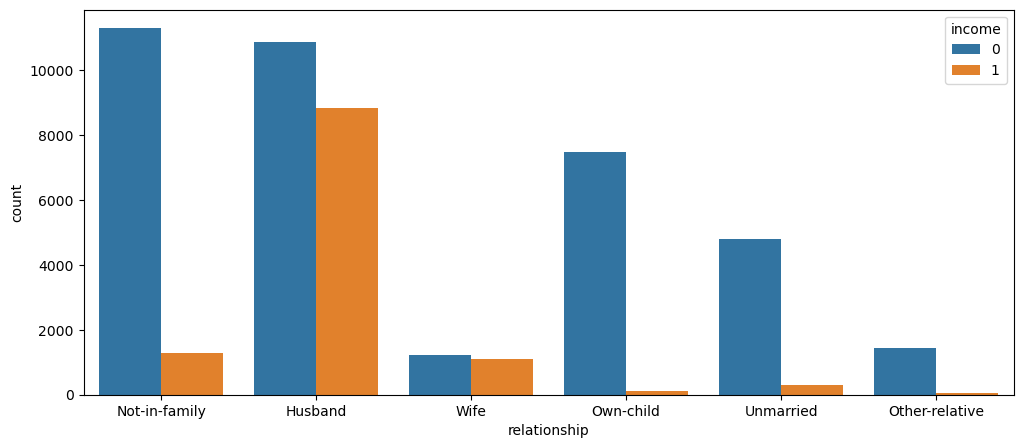

In [37]:
plt.figure(figsize=(12,5))
sns.countplot(x='relationship', hue='income', data=df)

<AxesSubplot:xlabel='race', ylabel='count'>

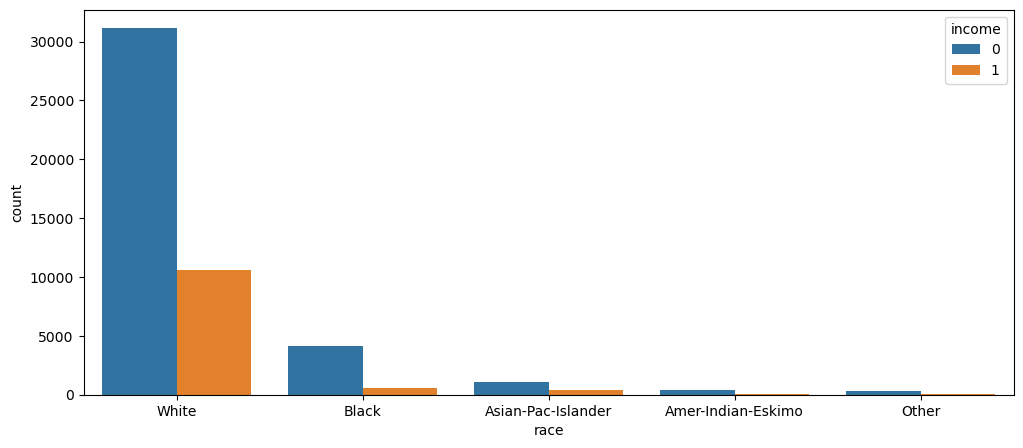

In [38]:
plt.figure(figsize=(12,5))
sns.countplot(x='race', hue='income', data=df)

<AxesSubplot:xlabel='sex', ylabel='count'>

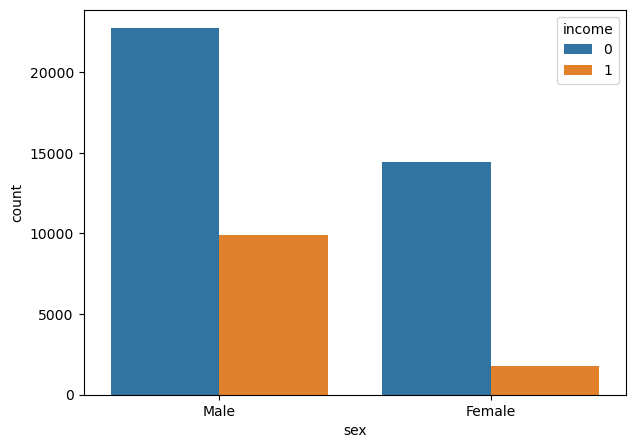

In [39]:
plt.figure(figsize=(7,5))
sns.countplot(x='sex', hue='income', data=df)

<AxesSubplot:xlabel='native-country', ylabel='count'>

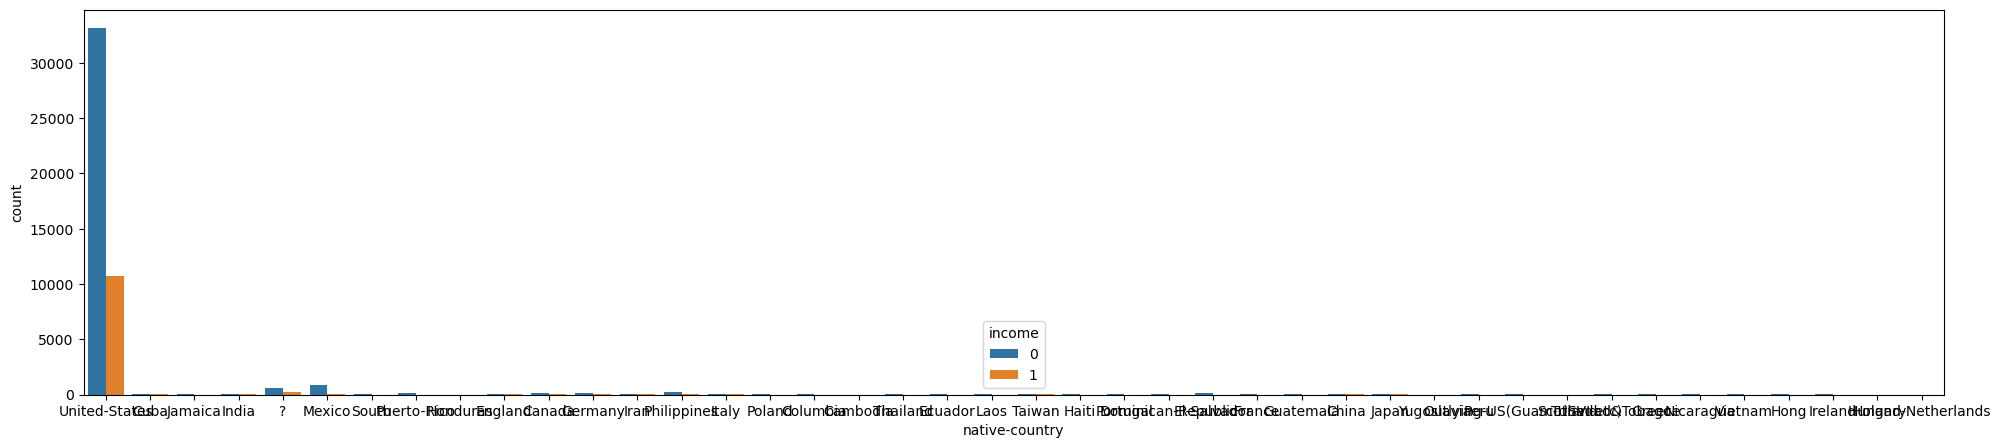

In [40]:
plt.figure(figsize=(24,5))
sns.countplot(x='native-country', hue='income', data=df)

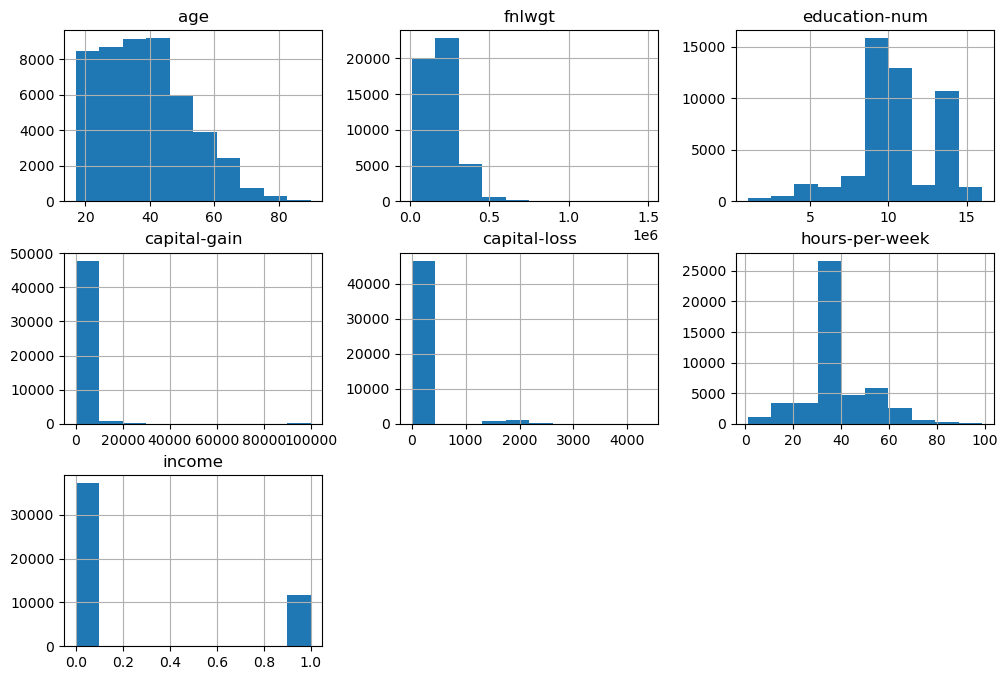

In [41]:
df.hist(figsize=(12,8))
plt.show()

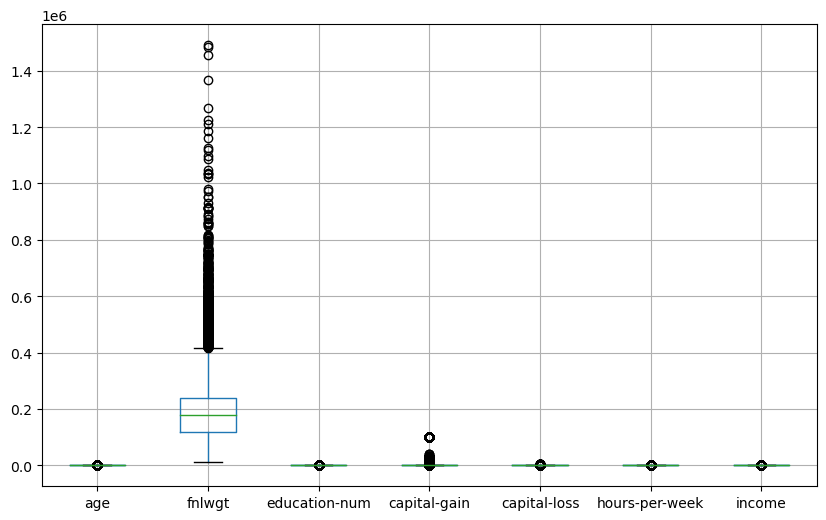

In [42]:
df.boxplot(figsize=(10,6))
plt.show()

In [43]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.239282
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


<AxesSubplot:>

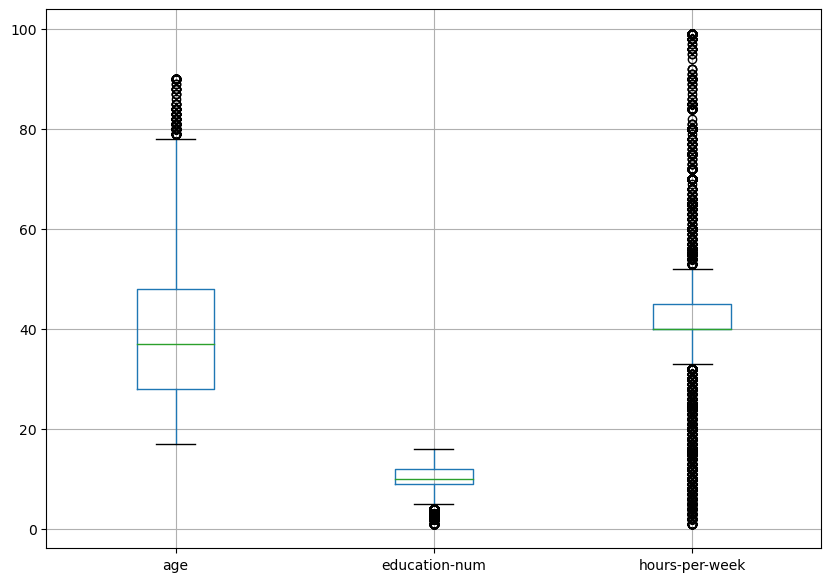

In [44]:
# Removing final weight, cap gain, cap loss for a better view
df[['age', 'education-num', 'hours-per-week']].boxplot(figsize=(10,7))

<AxesSubplot:>

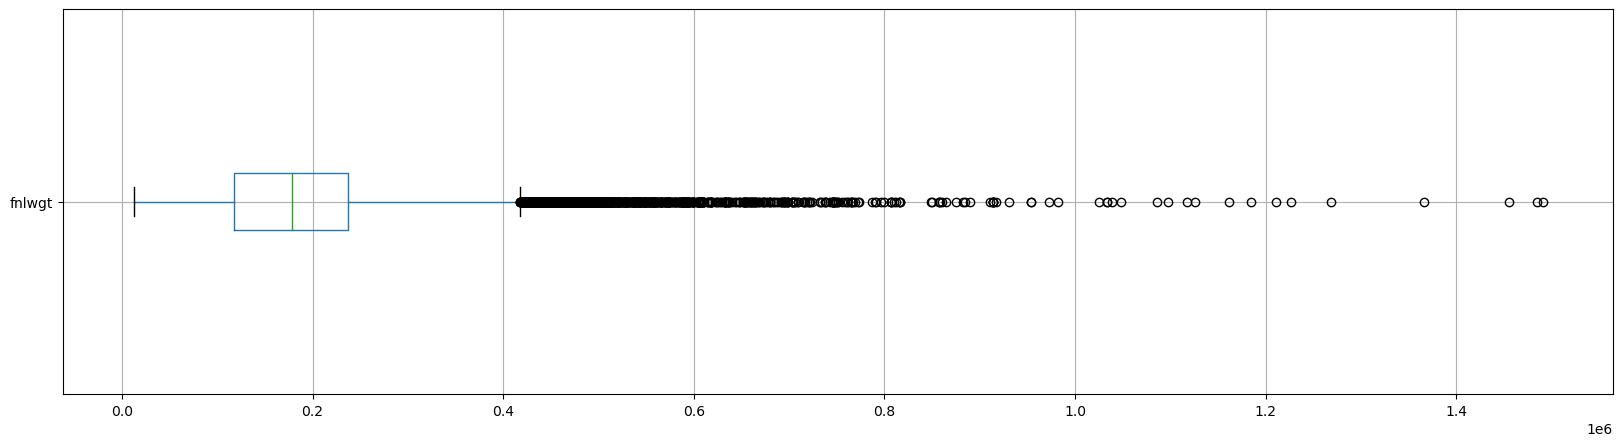

In [45]:
df[['fnlwgt']].boxplot(figsize=(20,5), vert=False)

In [46]:
df[df['fnlwgt'] > 400000]['income'].count()

1888

In [47]:
(1888*100)/df.shape[0]

3.8655255722533886

<AxesSubplot:>

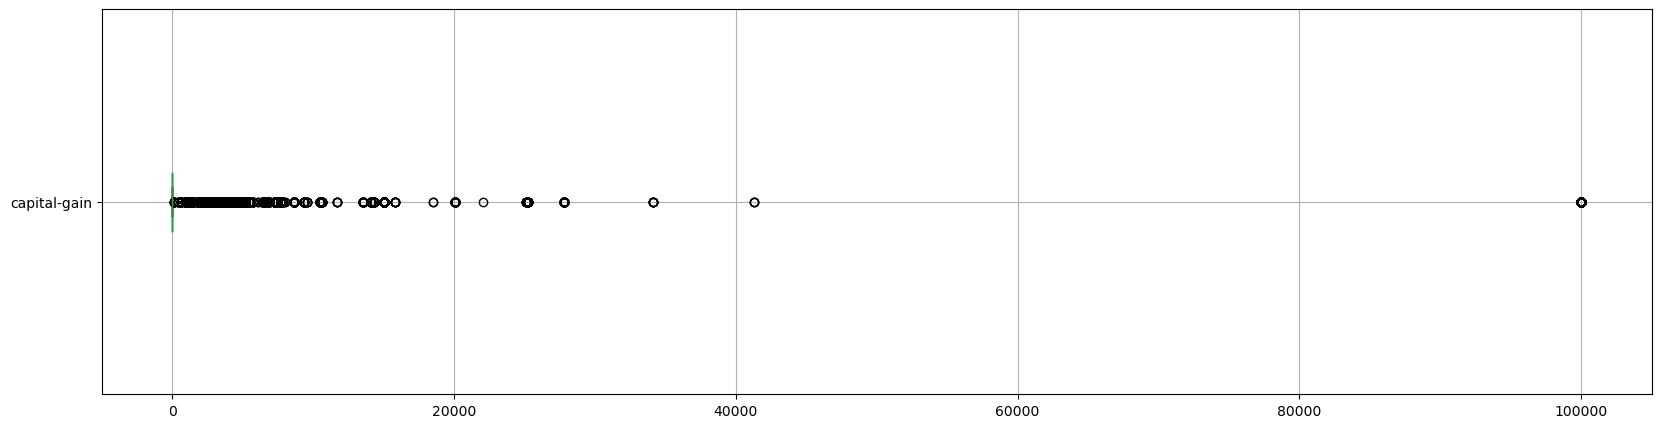

In [48]:
df[['capital-gain']].boxplot(figsize=(20,5), vert=False)

In [49]:
df[df['capital-gain'] > 0]['income'].count()


4035

In [50]:
(4035*100)/df.shape[0]


8.261332459768232

<AxesSubplot:>

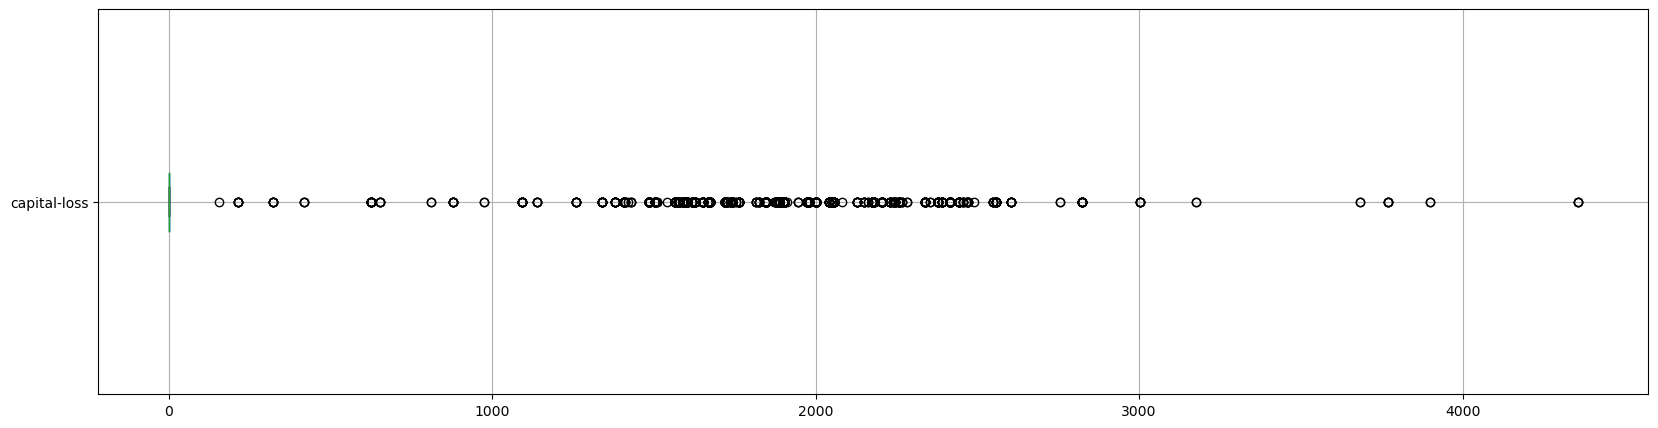

In [51]:
df[['capital-loss']].boxplot(figsize=(20,5), vert=False)


After exploring the columns with outliers, we decided to keep the capital gains and loss.
Regarding the final weight column, we'll drop that column since it's not clear what it is or how is calculated. We don't anticipate having an impact on the model.

In [52]:
df.drop('fnlwgt', axis=1, inplace=True)

In [53]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


# Save Cleaned Data

In [54]:
# Exporting without the index
df.to_csv('cleaned data.csv', index=False)